# Importamos las librearías

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import os

In [3]:
pathcampo = '../Base de datos con ruido/Campo 100 puntos'
pathtrayec = '../Base de datos con ruido/Trayectorias 200 eval'

# Vemos las gráficas de las bases de datos

## Trayectorias

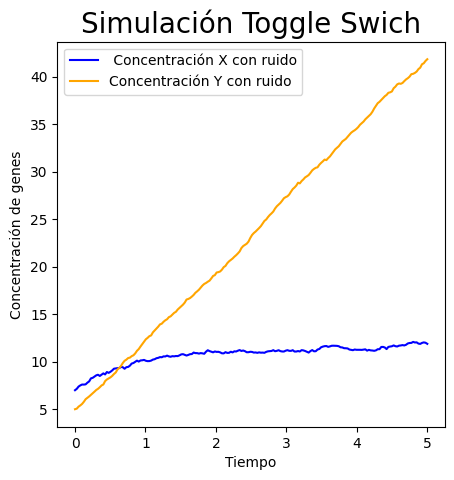

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import random

# Declaramos el vector de tiempo
T = 5
t_span = [0,5]
dt = 0.025
N = int(T/dt)
times = np.linspace(0, T, N)

for i in range(1):
    # constantes
    a1 = random.randint(0, 10)
    a2 = random.randint(0, 10)
    b1 = random.randint(0, 10)
    b2 = random.randint(0, 10)
    d1 = random.randint(0, 10)
    d2 = random.randint(0, 10)
    n = random.randint(0, 5)

    # Definimos las condiciones iniciales
    X = np.zeros(N)
    Y = np.zeros(N)
    X[0] = random.randint(0, 10)
    Y[0] = random.randint(0, 10)
    y0 = np.array([X[0], Y[0]])


    # Resolver el sistema de ecuaciones diferenciales sin ruido
    sol_without_noise = solve_ivp(f_without_noise, t_span, y0, t_eval=times)

    # Simulación con ruido
    for i in range(N-1):
        noise1 = np.random.normal(0, .5)
        noise2 = np.random.normal(0, .5)

        X[i+1] = X[i] + (a1/(1+Y[i]**n) - d1*X[i] + b1)*dt + noise1*np.sqrt(dt)
        Y[i+1] = Y[i] + (a2/(1+X[i]**n) - d2*Y[i] + b2)*dt + noise2*np.sqrt(dt)

    # Graficamos
    plt.figure(figsize=(5, 5))

    plt.plot(times, X, label=" Concentración X con ruido", alpha=1, color = 'blue')
    plt.plot(times, Y, label="Concentración Y con ruido", alpha=1, color = 'orange')
    plt.xlabel('Tiempo')
    plt.ylabel('Concentración de genes')
    plt.title('Simulación Toggle Swich', fontsize=20)
    plt.legend()
    plt.show()

## Campos vectoriales

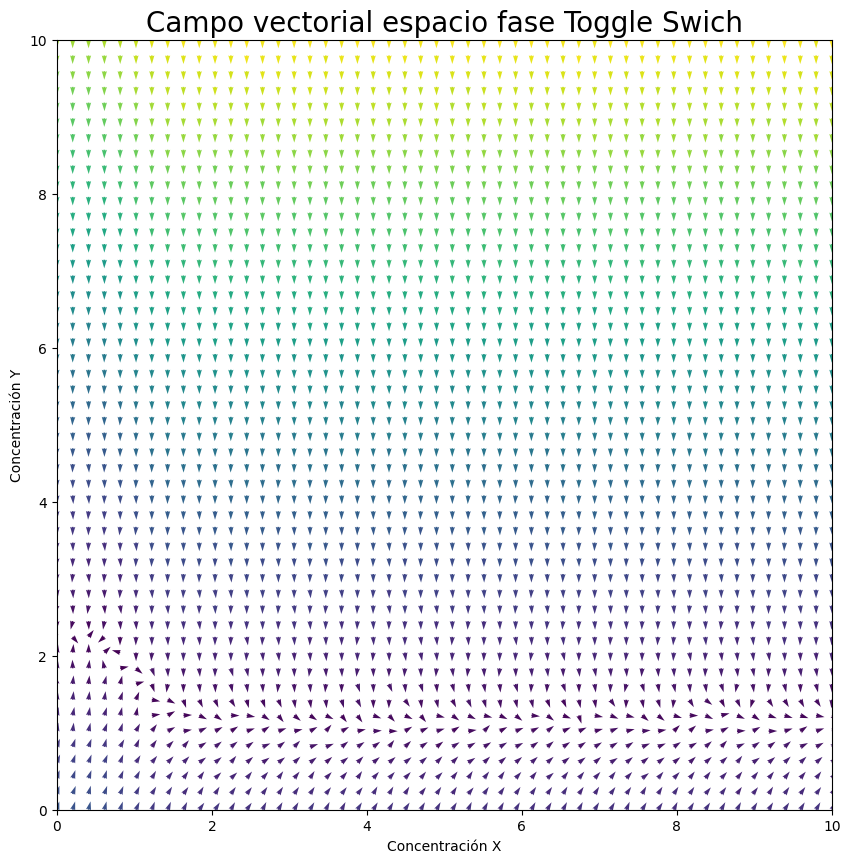

In [11]:
for i in range(0, 1):
    # constantes
    a1 = random.randint(0, 10)
    a2 = random.randint(0, 10)
    b1 = random.randint(0, 10)
    b2 = random.randint(0, 10)
    d1 = random.randint(0, 10)
    d2 = random.randint(0, 10)
    n = random.randint(0, 5)

    coef1 = [a1, a2, b1, b2, d1, d2, n]

    for i_ci in range(0, 1):
        x_range_neg = 0
        x_range_pos = 10
        y_range_neg = 0
        y_range_pos =10

        y1 = np.linspace(x_range_neg, x_range_pos, 50)
        y2 = np.linspace(y_range_neg, y_range_pos, 50)

        Y1, Y2 = np.meshgrid(y1, y2)

        t1 = 0

        NI, NJ = Y1.shape
        u, v = np.zeros((NI, NJ)), np.zeros((NI, NJ))

        for i in range(NI):
            for j in range(NJ):
                # asignar a cada ODE a un elemento de vector
                X = Y1[i, j]
                Y = Y2[i, j]
                noise1 = np.random.normal(0, .5)
                noise2 = np.random.normal(0, .5)

                # definimos cada ODE
                dX_dt=(a1)/(1+Y**(n))-(d1)*X+b1+noise1
                dY_dt=(a2)/(1+X**(n))-(d2)*Y+b2+noise2

                u[i, j], v[i, j] = dX_dt, dY_dt

        M = (np.hypot(u, v))
        u /= M
        v /= M

        plt.figure(figsize=(10, 10))
        Q = plt.quiver(Y1, Y2, u, v, M, angles='xy')
        plt.title('Campo vectorial espacio fase Toggle Swich', fontsize=20)
        plt.xlim([x_range_neg, x_range_pos])
        plt.ylim([y_range_neg, y_range_pos])
        plt.xlabel('Concentración X')
        plt.ylabel('Concentración Y')

# Creamos base de datos de las solcuiones

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import random
import os

# Declaramos el vector de tiempo
T = 5
t_span = [0,5]
dt = 0.025
N = int(T/dt)
times = np.linspace(0, T, N)

varf = []
coef = []
contador = 0

for i in range(1000):
    # constantes
    a1 = random.randint(0, 10)
    a2 = random.randint(0, 10)
    b1 = random.randint(0, 10)
    b2 = random.randint(0, 10)
    d1 = random.randint(0, 10)
    d2 = random.randint(0, 10)
    n = random.randint(0, 5)

    coef1 = [a1, a2, b1, b2, d1, d2, n]
    coef.append(coef1)

    varfci2 = []
    for i_ci in range(10):
        # Definimos las condiciones iniciales
        X = np.zeros(N)
        Y = np.zeros(N)
        X[0] = random.randint(0, 10)
        Y[0] = random.randint(0, 10)
        y0 = np.array([X[0], Y[0]])

        # Simulación con ruido
        for i in range(N-1):
            noise1 = np.random.normal(0, .5)
            noise2 = np.random.normal(0, .5)

            X[i+1] = X[i] + (a1/(1+Y[i]**n) - d1*X[i] + b1)*dt + noise1*np.sqrt(dt)
            Y[i+1] = Y[i] + (a2/(1+X[i]**n) - d2*Y[i] + b2)*dt + noise2*np.sqrt(dt)

        varfci = np.append([X], [Y], axis=0)
        varfci2.append(varfci)

    varf.append(varfci2)
    print('--------------------------------------------')
    print(coef1)
    contador = contador+1
    print(contador)

varf = np.array(varf)
np.save(os.path.join(pathtrayec, 'varfval'), varf)
coef = np.array(coef)
np.save(os.path.join(pathtrayec, 'coefvarfval'),coef)

--------------------------------------------
[7, 6, 8, 8, 6, 10, 0]
1
--------------------------------------------
[1, 0, 8, 2, 3, 10, 3]
2
--------------------------------------------
[7, 3, 3, 9, 6, 6, 5]
3
--------------------------------------------
[9, 10, 4, 1, 1, 1, 0]
4
--------------------------------------------
[8, 2, 6, 5, 3, 7, 3]
5
--------------------------------------------
[0, 7, 7, 5, 1, 5, 3]
6
--------------------------------------------
[6, 2, 10, 8, 0, 3, 2]
7
--------------------------------------------
[5, 7, 8, 5, 10, 4, 3]
8
--------------------------------------------
[9, 10, 6, 0, 6, 6, 2]
9
--------------------------------------------
[10, 4, 7, 3, 0, 5, 3]
10
--------------------------------------------
[2, 5, 0, 10, 6, 0, 2]
11
--------------------------------------------
[5, 6, 0, 1, 6, 7, 2]
12
--------------------------------------------
[2, 1, 8, 1, 9, 0, 3]
13
--------------------------------------------
[7, 1, 1, 1, 3, 1, 1]
14
---------------------

--------------------------------------------
[1, 10, 8, 9, 4, 9, 5]
122
--------------------------------------------
[10, 10, 5, 7, 5, 8, 3]
123
--------------------------------------------
[6, 10, 4, 5, 8, 8, 2]
124
--------------------------------------------
[5, 4, 2, 7, 7, 9, 4]
125
--------------------------------------------
[1, 0, 3, 3, 3, 4, 2]
126
--------------------------------------------
[6, 3, 8, 9, 8, 5, 1]
127
--------------------------------------------
[4, 1, 2, 3, 8, 4, 2]
128
--------------------------------------------
[3, 1, 4, 3, 3, 3, 4]
129
--------------------------------------------
[4, 4, 10, 8, 4, 4, 0]
130
--------------------------------------------
[0, 8, 0, 8, 8, 7, 0]
131
--------------------------------------------
[7, 2, 8, 9, 8, 6, 1]
132
--------------------------------------------
[10, 4, 0, 10, 6, 7, 3]
133
--------------------------------------------
[5, 4, 8, 10, 0, 9, 4]
134
--------------------------------------------
[0, 9, 2, 5, 7, 0, 3]
13

--------------------------------------------
[9, 9, 2, 0, 5, 7, 0]
249
--------------------------------------------
[8, 5, 1, 7, 8, 8, 5]
250
--------------------------------------------
[10, 9, 9, 4, 5, 0, 2]
251
--------------------------------------------
[5, 0, 4, 2, 6, 4, 1]
252
--------------------------------------------
[3, 0, 1, 5, 5, 7, 2]
253
--------------------------------------------
[7, 3, 3, 5, 3, 10, 4]
254
--------------------------------------------
[1, 1, 5, 2, 5, 6, 0]
255
--------------------------------------------
[0, 7, 3, 6, 10, 0, 3]
256
--------------------------------------------
[6, 2, 10, 3, 10, 1, 4]
257
--------------------------------------------
[9, 9, 8, 2, 3, 10, 2]
258
--------------------------------------------
[3, 3, 3, 9, 1, 0, 3]
259
--------------------------------------------
[6, 0, 5, 10, 2, 9, 3]
260
--------------------------------------------
[2, 4, 4, 2, 7, 10, 0]
261
--------------------------------------------
[9, 9, 0, 5, 1, 4, 3]
26

--------------------------------------------
[6, 6, 4, 8, 1, 4, 2]
380
--------------------------------------------
[8, 6, 1, 6, 1, 4, 0]
381
--------------------------------------------
[8, 3, 1, 3, 0, 9, 0]
382
--------------------------------------------
[6, 10, 7, 7, 2, 4, 2]
383
--------------------------------------------
[7, 8, 1, 1, 5, 5, 2]
384
--------------------------------------------
[0, 1, 10, 7, 4, 7, 1]
385
--------------------------------------------
[2, 1, 9, 0, 6, 5, 2]
386
--------------------------------------------
[8, 4, 6, 4, 2, 2, 1]
387
--------------------------------------------
[8, 8, 7, 5, 6, 7, 2]
388
--------------------------------------------
[4, 10, 7, 5, 10, 1, 5]
389
--------------------------------------------
[6, 7, 8, 3, 1, 9, 4]
390
--------------------------------------------
[4, 10, 7, 4, 2, 8, 0]
391
--------------------------------------------
[2, 1, 4, 10, 3, 7, 4]
392
--------------------------------------------
[10, 4, 4, 5, 8, 1, 0]
393

--------------------------------------------
[7, 4, 7, 1, 6, 6, 2]
505
--------------------------------------------
[10, 1, 1, 6, 7, 6, 1]
506
--------------------------------------------
[3, 0, 6, 6, 7, 9, 2]
507
--------------------------------------------
[6, 7, 6, 4, 7, 5, 4]
508
--------------------------------------------
[6, 1, 9, 3, 2, 0, 3]
509
--------------------------------------------
[6, 9, 2, 7, 1, 0, 3]
510
--------------------------------------------
[5, 2, 7, 2, 5, 9, 4]
511
--------------------------------------------
[0, 10, 3, 9, 9, 8, 5]
512
--------------------------------------------
[9, 3, 8, 3, 8, 1, 3]
513
--------------------------------------------
[10, 4, 10, 6, 10, 6, 2]
514
--------------------------------------------
[2, 9, 6, 1, 10, 4, 0]
515
--------------------------------------------
[9, 2, 2, 6, 3, 0, 2]
516
--------------------------------------------
[3, 1, 7, 10, 9, 4, 5]
517
--------------------------------------------
[2, 8, 4, 7, 8, 7, 3]
518

--------------------------------------------
[4, 2, 1, 6, 7, 1, 1]
632
--------------------------------------------
[4, 4, 5, 4, 10, 1, 2]
633
--------------------------------------------
[4, 7, 5, 2, 4, 5, 4]
634
--------------------------------------------
[7, 0, 5, 7, 2, 6, 3]
635
--------------------------------------------
[5, 9, 5, 4, 7, 0, 2]
636
--------------------------------------------
[0, 7, 4, 0, 9, 8, 5]
637
--------------------------------------------
[8, 6, 5, 3, 0, 5, 0]
638
--------------------------------------------
[6, 5, 6, 8, 8, 9, 0]
639
--------------------------------------------
[5, 5, 2, 10, 1, 9, 1]
640
--------------------------------------------
[5, 1, 5, 3, 10, 2, 3]
641
--------------------------------------------
[2, 8, 5, 3, 9, 9, 1]
642
--------------------------------------------
[0, 8, 5, 9, 10, 4, 5]
643
--------------------------------------------
[9, 10, 2, 0, 10, 7, 3]
644
--------------------------------------------
[0, 4, 6, 9, 4, 9, 3]
645


--------------------------------------------
[3, 1, 8, 4, 3, 1, 0]
756
--------------------------------------------
[0, 2, 3, 7, 10, 1, 0]
757
--------------------------------------------
[3, 10, 2, 3, 7, 2, 4]
758
--------------------------------------------
[8, 4, 6, 0, 1, 3, 0]
759
--------------------------------------------
[7, 1, 6, 10, 7, 10, 3]
760
--------------------------------------------
[8, 7, 9, 8, 7, 6, 3]
761
--------------------------------------------
[1, 10, 6, 0, 1, 3, 5]
762
--------------------------------------------
[8, 2, 0, 9, 5, 4, 3]
763
--------------------------------------------
[7, 9, 7, 8, 6, 6, 2]
764
--------------------------------------------
[9, 10, 4, 0, 8, 4, 4]
765
--------------------------------------------
[8, 0, 10, 4, 2, 6, 2]
766
--------------------------------------------
[2, 0, 4, 6, 5, 0, 3]
767
--------------------------------------------
[1, 10, 10, 4, 0, 5, 2]
768
--------------------------------------------
[7, 1, 9, 4, 7, 7, 3]
7

--------------------------------------------
[7, 2, 5, 6, 8, 4, 3]
884
--------------------------------------------
[2, 1, 9, 9, 10, 5, 5]
885
--------------------------------------------
[8, 6, 7, 7, 5, 0, 3]
886
--------------------------------------------
[10, 9, 7, 4, 9, 6, 3]
887
--------------------------------------------
[9, 7, 4, 9, 5, 2, 2]
888
--------------------------------------------
[5, 2, 6, 9, 8, 3, 4]
889
--------------------------------------------
[10, 8, 7, 9, 6, 7, 3]
890
--------------------------------------------
[9, 5, 5, 8, 8, 3, 5]
891
--------------------------------------------
[6, 8, 4, 10, 7, 10, 1]
892
--------------------------------------------
[3, 9, 10, 3, 8, 2, 1]
893
--------------------------------------------
[7, 1, 10, 5, 6, 10, 1]
894
--------------------------------------------
[3, 10, 9, 8, 0, 9, 1]
895
--------------------------------------------
[6, 8, 10, 9, 9, 10, 5]
896
--------------------------------------------
[1, 1, 9, 5, 5, 6, 3]

# Creamos base de datos espacio vectorial

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import random
import os

campvec = []
coef = []
contador = 0

for i in range(0, 7000):
    # constantes
    a1 = random.randint(0, 10)
    a2 = random.randint(0, 10)
    b1 = random.randint(0, 10)
    b2 = random.randint(0, 10)
    d1 = random.randint(0, 10)
    d2 = random.randint(0, 10)
    n = random.randint(0, 5)

    coef1 = [a1, a2, b1, b2, d1, d2, n]
    coef.append(coef1)

    x_range_neg = 0
    x_range_pos = 10
    y_range_neg = 0
    y_range_pos = 10

    y1 = np.linspace(x_range_neg, x_range_pos, 100)
    y2 = np.linspace(y_range_neg, y_range_pos, 100)

    Y1, Y2 = np.meshgrid(y1, y2)

    NI, NJ = Y1.shape
    u, v = np.zeros((NI, NJ)), np.zeros((NI, NJ))

    for i in range(NI):
        for j in range(NJ):
            # asignar a cada ODE a un elemento de vector
            X = Y1[i, j]
            Y = Y2[i, j]
            noise1 = np.random.normal(0, .5)
            noise2 = np.random.normal(0, .5)

            # definimos cada ODE
            dX_dt=(a1)/(1+Y**(n))-(d1)*X+b1+noise1
            dY_dt=(a2)/(1+X**(n))-(d2)*Y+b2+noise2

            u[i, j], v[i, j] = dX_dt, dY_dt

    M = (np.hypot(u, v))
    u /= M
    v /= M

    campvecci = np.append([u], [v], axis=0)
    campvec.append(campvecci)

    print('--------------------------------------------')
    print(coef1)
    contador = contador+1
    print(contador)

campvec = np.array(campvec)
np.save(os.path.join(pathcampo,'campvectrain'), campvec)
coef = np.array(coef)
np.save(os.path.join(pathcampo,'coefcampvectrain'),coef)

--------------------------------------------
[4, 6, 2, 2, 4, 8, 3]
1
--------------------------------------------
[4, 0, 7, 10, 7, 9, 5]
2
--------------------------------------------
[0, 8, 7, 6, 0, 0, 5]
3
--------------------------------------------
[0, 0, 3, 6, 1, 2, 3]
4
--------------------------------------------
[0, 2, 10, 0, 0, 4, 2]
5
--------------------------------------------
[0, 10, 1, 3, 1, 9, 3]
6
--------------------------------------------
[7, 7, 0, 1, 10, 9, 1]
7
--------------------------------------------
[8, 1, 2, 4, 9, 0, 2]
8
--------------------------------------------
[2, 2, 5, 0, 2, 7, 3]
9
--------------------------------------------
[10, 10, 8, 9, 6, 4, 1]
10
--------------------------------------------
[0, 3, 6, 6, 6, 7, 0]
11
--------------------------------------------
[10, 1, 0, 8, 7, 0, 2]
12
--------------------------------------------
[3, 0, 3, 8, 6, 5, 3]
13
--------------------------------------------
[3, 2, 7, 8, 0, 1, 2]
14
----------------------

--------------------------------------------
[9, 3, 5, 9, 5, 2, 1]
121
--------------------------------------------
[10, 3, 2, 10, 8, 8, 3]
122
--------------------------------------------
[9, 6, 3, 7, 7, 3, 3]
123
--------------------------------------------
[5, 4, 0, 6, 7, 7, 3]
124
--------------------------------------------
[2, 0, 2, 3, 6, 1, 1]
125
--------------------------------------------
[8, 7, 9, 5, 7, 6, 2]
126
--------------------------------------------
[2, 8, 2, 10, 5, 8, 3]
127
--------------------------------------------
[9, 9, 3, 10, 10, 7, 5]
128
--------------------------------------------
[7, 6, 7, 8, 4, 7, 0]
129
--------------------------------------------
[9, 2, 10, 10, 7, 3, 0]
130
--------------------------------------------
[2, 2, 0, 8, 6, 8, 5]
131
--------------------------------------------
[6, 0, 5, 10, 0, 9, 2]
132
--------------------------------------------
[9, 2, 8, 8, 1, 7, 2]
133
--------------------------------------------
[5, 9, 9, 2, 7, 5, 1]
13

--------------------------------------------
[1, 5, 6, 3, 1, 4, 5]
239
--------------------------------------------
[7, 2, 10, 8, 10, 3, 4]
240
--------------------------------------------
[6, 5, 1, 1, 9, 8, 1]
241
--------------------------------------------
[6, 10, 1, 4, 4, 3, 5]
242
--------------------------------------------
[1, 4, 7, 4, 1, 6, 2]
243
--------------------------------------------
[2, 1, 1, 3, 6, 6, 1]
244
--------------------------------------------
[0, 10, 4, 4, 10, 8, 5]
245
--------------------------------------------
[9, 1, 8, 9, 4, 4, 1]
246
--------------------------------------------
[6, 7, 9, 0, 3, 6, 0]
247
--------------------------------------------
[3, 10, 3, 9, 7, 2, 1]
248
--------------------------------------------
[7, 3, 10, 8, 4, 8, 1]
249
--------------------------------------------
[1, 7, 9, 9, 5, 8, 0]
250
--------------------------------------------
[3, 4, 2, 8, 8, 2, 0]
251
--------------------------------------------
[2, 0, 10, 8, 5, 2, 4]
25

--------------------------------------------
[8, 0, 5, 9, 10, 7, 2]
354
--------------------------------------------
[10, 10, 9, 10, 6, 3, 0]
355
--------------------------------------------
[10, 6, 8, 5, 3, 5, 1]
356
--------------------------------------------
[6, 0, 2, 6, 6, 9, 3]
357
--------------------------------------------
[0, 9, 10, 4, 6, 1, 0]
358
--------------------------------------------
[6, 4, 5, 7, 5, 8, 4]
359
--------------------------------------------
[10, 0, 7, 3, 7, 5, 2]
360
--------------------------------------------
[9, 2, 1, 1, 1, 4, 4]
361
--------------------------------------------
[3, 2, 0, 3, 4, 0, 1]
362
--------------------------------------------
[4, 10, 5, 7, 9, 9, 2]
363
--------------------------------------------
[10, 2, 10, 3, 6, 7, 1]
364
--------------------------------------------
[6, 4, 9, 3, 5, 9, 3]
365
--------------------------------------------
[5, 4, 7, 1, 2, 1, 2]
366
--------------------------------------------
[1, 2, 1, 4, 6, 10, 2]

--------------------------------------------
[10, 4, 8, 3, 9, 3, 2]
470
--------------------------------------------
[2, 2, 8, 7, 4, 10, 4]
471
--------------------------------------------
[6, 7, 9, 10, 9, 10, 3]
472
--------------------------------------------
[2, 8, 6, 6, 4, 5, 1]
473
--------------------------------------------
[2, 9, 1, 6, 5, 2, 2]
474
--------------------------------------------
[5, 9, 0, 10, 7, 1, 0]
475
--------------------------------------------
[6, 2, 4, 6, 7, 8, 5]
476
--------------------------------------------
[4, 5, 8, 9, 0, 9, 4]
477
--------------------------------------------
[6, 2, 3, 9, 8, 8, 2]
478
--------------------------------------------
[4, 0, 3, 9, 7, 1, 5]
479
--------------------------------------------
[3, 7, 3, 9, 7, 5, 5]
480
--------------------------------------------
[8, 6, 8, 9, 2, 9, 5]
481
--------------------------------------------
[9, 8, 5, 3, 0, 4, 2]
482
--------------------------------------------
[5, 5, 10, 3, 5, 4, 0]
483


--------------------------------------------
[10, 1, 9, 7, 1, 10, 4]
587
--------------------------------------------
[1, 3, 8, 10, 8, 6, 4]
588
--------------------------------------------
[5, 7, 4, 5, 4, 2, 4]
589
--------------------------------------------
[2, 9, 9, 8, 1, 4, 0]
590
--------------------------------------------
[2, 0, 3, 6, 7, 2, 3]
591
--------------------------------------------
[9, 1, 1, 10, 10, 2, 5]
592
--------------------------------------------
[1, 3, 6, 2, 3, 9, 3]
593
--------------------------------------------
[3, 5, 3, 1, 10, 3, 4]
594
--------------------------------------------
[7, 3, 7, 10, 7, 0, 4]
595
--------------------------------------------
[7, 10, 0, 3, 10, 6, 1]
596
--------------------------------------------
[5, 7, 7, 2, 5, 3, 1]
597
--------------------------------------------
[6, 10, 9, 7, 0, 3, 5]
598
--------------------------------------------
[2, 8, 3, 2, 7, 2, 1]
599
--------------------------------------------
[8, 4, 1, 1, 5, 10, 2]

--------------------------------------------
[7, 5, 1, 2, 3, 2, 4]
704
--------------------------------------------
[1, 2, 5, 2, 2, 2, 2]
705
--------------------------------------------
[10, 6, 6, 1, 0, 4, 0]
706
--------------------------------------------
[9, 5, 3, 1, 6, 10, 2]
707
--------------------------------------------
[7, 6, 1, 5, 9, 1, 1]
708
--------------------------------------------
[7, 6, 3, 0, 7, 2, 0]
709
--------------------------------------------
[4, 6, 3, 7, 6, 2, 1]
710
--------------------------------------------
[4, 4, 5, 3, 9, 4, 3]
711
--------------------------------------------
[1, 0, 5, 5, 9, 10, 1]
712
--------------------------------------------
[3, 1, 5, 0, 2, 0, 3]
713
--------------------------------------------
[7, 1, 1, 6, 8, 5, 1]
714
--------------------------------------------
[0, 8, 7, 4, 0, 8, 5]
715
--------------------------------------------
[7, 1, 8, 4, 7, 2, 1]
716
--------------------------------------------
[1, 2, 9, 8, 2, 10, 1]
717
--

--------------------------------------------
[10, 5, 0, 4, 8, 7, 0]
822
--------------------------------------------
[5, 8, 9, 4, 8, 3, 3]
823
--------------------------------------------
[3, 4, 5, 10, 2, 2, 3]
824
--------------------------------------------
[9, 0, 0, 8, 8, 8, 0]
825
--------------------------------------------
[1, 0, 5, 10, 7, 3, 3]
826
--------------------------------------------
[4, 7, 10, 2, 10, 6, 2]
827
--------------------------------------------
[6, 4, 5, 0, 8, 5, 3]
828
--------------------------------------------
[9, 8, 3, 1, 7, 8, 2]
829
--------------------------------------------
[5, 6, 7, 2, 3, 1, 1]
830
--------------------------------------------
[4, 0, 1, 7, 4, 5, 5]
831
--------------------------------------------
[1, 9, 6, 10, 9, 10, 4]
832
--------------------------------------------
[0, 2, 6, 7, 8, 6, 4]
833
--------------------------------------------
[9, 9, 6, 7, 0, 4, 4]
834
--------------------------------------------
[3, 6, 6, 10, 2, 2, 2]
83

--------------------------------------------
[0, 7, 2, 3, 10, 0, 1]
940
--------------------------------------------
[7, 3, 2, 5, 10, 7, 5]
941
--------------------------------------------
[2, 6, 4, 4, 6, 5, 4]
942
--------------------------------------------
[3, 4, 10, 6, 2, 9, 3]
943
--------------------------------------------
[7, 7, 9, 1, 8, 5, 3]
944
--------------------------------------------
[3, 9, 7, 0, 2, 1, 0]
945
--------------------------------------------
[9, 7, 7, 1, 3, 1, 1]
946
--------------------------------------------
[7, 6, 10, 2, 7, 3, 2]
947
--------------------------------------------
[1, 3, 10, 9, 9, 3, 0]
948
--------------------------------------------
[2, 5, 6, 7, 1, 0, 3]
949
--------------------------------------------
[0, 1, 9, 2, 6, 9, 0]
950
--------------------------------------------
[3, 6, 7, 10, 5, 10, 0]
951
--------------------------------------------
[1, 4, 1, 9, 0, 2, 3]
952
--------------------------------------------
[9, 8, 3, 6, 4, 2, 4]
953

--------------------------------------------
[10, 8, 4, 5, 6, 10, 5]
1056
--------------------------------------------
[7, 6, 6, 3, 0, 6, 0]
1057
--------------------------------------------
[2, 8, 6, 9, 9, 3, 0]
1058
--------------------------------------------
[5, 7, 2, 6, 1, 5, 0]
1059
--------------------------------------------
[3, 0, 10, 9, 9, 3, 3]
1060
--------------------------------------------
[4, 5, 0, 0, 10, 6, 0]
1061
--------------------------------------------
[6, 3, 6, 5, 8, 10, 5]
1062
--------------------------------------------
[2, 9, 2, 1, 10, 4, 5]
1063
--------------------------------------------
[7, 10, 6, 1, 8, 0, 2]
1064
--------------------------------------------
[10, 10, 1, 0, 9, 7, 0]
1065
--------------------------------------------
[8, 7, 0, 7, 6, 5, 5]
1066
--------------------------------------------
[7, 4, 6, 5, 0, 2, 2]
1067
--------------------------------------------
[0, 3, 1, 1, 8, 1, 0]
1068
--------------------------------------------
[4, 3, 0, 

--------------------------------------------
[5, 8, 8, 2, 1, 9, 3]
1171
--------------------------------------------
[1, 10, 5, 6, 8, 0, 5]
1172
--------------------------------------------
[3, 1, 6, 3, 4, 9, 1]
1173
--------------------------------------------
[8, 4, 7, 3, 4, 1, 5]
1174
--------------------------------------------
[7, 8, 8, 8, 6, 10, 4]
1175
--------------------------------------------
[1, 5, 3, 1, 5, 0, 0]
1176
--------------------------------------------
[3, 0, 5, 7, 2, 2, 1]
1177
--------------------------------------------
[6, 10, 5, 10, 4, 9, 5]
1178
--------------------------------------------
[7, 10, 3, 7, 9, 8, 1]
1179
--------------------------------------------
[7, 8, 5, 0, 10, 9, 0]
1180
--------------------------------------------
[7, 1, 2, 1, 2, 10, 2]
1181
--------------------------------------------
[5, 7, 10, 5, 0, 2, 2]
1182
--------------------------------------------
[3, 2, 0, 6, 9, 3, 5]
1183
--------------------------------------------
[3, 7, 8, 4

--------------------------------------------
[2, 1, 6, 5, 2, 7, 0]
1284
--------------------------------------------
[10, 6, 0, 6, 9, 3, 5]
1285
--------------------------------------------
[8, 10, 4, 1, 5, 4, 3]
1286
--------------------------------------------
[0, 10, 3, 3, 6, 4, 4]
1287
--------------------------------------------
[7, 6, 8, 4, 1, 1, 4]
1288
--------------------------------------------
[8, 8, 9, 7, 4, 8, 5]
1289
--------------------------------------------
[3, 0, 0, 5, 5, 3, 5]
1290
--------------------------------------------
[1, 3, 2, 9, 6, 4, 4]
1291
--------------------------------------------
[4, 6, 3, 8, 9, 7, 4]
1292
--------------------------------------------
[9, 7, 10, 9, 3, 8, 0]
1293
--------------------------------------------
[2, 0, 7, 10, 7, 8, 2]
1294
--------------------------------------------
[9, 6, 7, 4, 0, 1, 3]
1295
--------------------------------------------
[7, 10, 2, 4, 4, 6, 5]
1296
--------------------------------------------
[2, 9, 4, 10,

--------------------------------------------
[8, 0, 1, 7, 6, 1, 1]
1400
--------------------------------------------
[8, 1, 6, 0, 10, 0, 4]
1401
--------------------------------------------
[8, 5, 8, 2, 5, 7, 5]
1402
--------------------------------------------
[9, 10, 1, 3, 10, 1, 2]
1403
--------------------------------------------
[0, 6, 10, 2, 2, 0, 1]
1404
--------------------------------------------
[8, 2, 3, 5, 0, 4, 1]
1405
--------------------------------------------
[0, 0, 5, 10, 6, 6, 1]
1406
--------------------------------------------
[8, 8, 9, 6, 6, 1, 4]
1407
--------------------------------------------
[5, 5, 8, 7, 4, 5, 3]
1408
--------------------------------------------
[0, 4, 1, 7, 7, 8, 3]
1409
--------------------------------------------
[1, 3, 9, 0, 9, 1, 3]
1410
--------------------------------------------
[4, 2, 7, 8, 6, 4, 4]
1411
--------------------------------------------
[3, 6, 2, 8, 3, 4, 0]
1412
--------------------------------------------
[6, 2, 7, 2, 5

--------------------------------------------
[5, 9, 7, 9, 0, 4, 3]
1514
--------------------------------------------
[1, 4, 3, 9, 7, 4, 2]
1515
--------------------------------------------
[3, 10, 1, 3, 3, 0, 0]
1516
--------------------------------------------
[6, 1, 0, 1, 3, 9, 2]
1517
--------------------------------------------
[6, 10, 5, 9, 1, 2, 1]
1518
--------------------------------------------
[6, 0, 8, 7, 2, 8, 1]
1519
--------------------------------------------
[7, 0, 2, 4, 10, 3, 2]
1520
--------------------------------------------
[9, 1, 2, 5, 0, 1, 2]
1521
--------------------------------------------
[3, 0, 9, 6, 8, 9, 0]
1522
--------------------------------------------
[8, 6, 1, 2, 8, 8, 0]
1523
--------------------------------------------
[9, 8, 5, 8, 0, 8, 3]
1524
--------------------------------------------
[3, 2, 3, 3, 1, 6, 0]
1525
--------------------------------------------
[3, 4, 5, 4, 4, 7, 5]
1526
--------------------------------------------
[10, 0, 0, 8, 5,

--------------------------------------------
[1, 9, 10, 0, 9, 0, 4]
1629
--------------------------------------------
[6, 10, 4, 2, 8, 7, 0]
1630
--------------------------------------------
[8, 3, 6, 0, 8, 2, 4]
1631
--------------------------------------------
[6, 6, 1, 0, 3, 8, 3]
1632
--------------------------------------------
[0, 7, 4, 4, 8, 9, 3]
1633
--------------------------------------------
[4, 5, 4, 1, 8, 0, 1]
1634
--------------------------------------------
[9, 1, 4, 6, 3, 2, 1]
1635
--------------------------------------------
[6, 4, 9, 5, 10, 9, 1]
1636
--------------------------------------------
[10, 2, 8, 4, 6, 6, 2]
1637
--------------------------------------------
[6, 5, 8, 3, 6, 7, 5]
1638
--------------------------------------------
[3, 4, 2, 10, 5, 0, 5]
1639
--------------------------------------------
[8, 8, 0, 0, 5, 3, 2]
1640
--------------------------------------------
[3, 6, 8, 4, 8, 5, 2]
1641
--------------------------------------------
[10, 3, 7, 2, 

--------------------------------------------
[0, 7, 8, 3, 3, 2, 5]
1744
--------------------------------------------
[8, 8, 1, 0, 2, 1, 5]
1745
--------------------------------------------
[7, 1, 9, 5, 3, 1, 1]
1746
--------------------------------------------
[7, 8, 1, 0, 7, 6, 2]
1747
--------------------------------------------
[9, 4, 1, 4, 6, 6, 4]
1748
--------------------------------------------
[5, 5, 3, 9, 5, 7, 4]
1749
--------------------------------------------
[9, 10, 4, 0, 3, 5, 2]
1750
--------------------------------------------
[1, 7, 2, 6, 8, 1, 3]
1751
--------------------------------------------
[6, 6, 10, 3, 8, 10, 5]
1752
--------------------------------------------
[0, 1, 0, 9, 5, 4, 4]
1753
--------------------------------------------
[0, 0, 2, 1, 7, 8, 3]
1754
--------------------------------------------
[6, 9, 0, 3, 5, 10, 4]
1755
--------------------------------------------
[8, 0, 3, 6, 3, 4, 1]
1756
--------------------------------------------
[0, 0, 5, 4, 2,

--------------------------------------------
[5, 5, 10, 3, 10, 0, 2]
1860
--------------------------------------------
[9, 10, 4, 9, 7, 8, 2]
1861
--------------------------------------------
[7, 1, 3, 6, 7, 8, 3]
1862
--------------------------------------------
[0, 8, 9, 9, 9, 5, 1]
1863
--------------------------------------------
[0, 3, 0, 9, 7, 0, 4]
1864
--------------------------------------------
[2, 8, 8, 7, 8, 4, 0]
1865
--------------------------------------------
[3, 4, 6, 1, 5, 1, 3]
1866
--------------------------------------------
[3, 5, 3, 4, 4, 6, 2]
1867
--------------------------------------------
[0, 6, 9, 9, 4, 9, 5]
1868
--------------------------------------------
[3, 3, 9, 4, 10, 9, 2]
1869
--------------------------------------------
[6, 10, 10, 2, 3, 8, 5]
1870
--------------------------------------------
[6, 0, 10, 9, 0, 2, 2]
1871
--------------------------------------------
[9, 7, 8, 9, 1, 7, 4]
1872
--------------------------------------------
[9, 4, 4, 0,

--------------------------------------------
[2, 10, 5, 2, 6, 6, 5]
1976
--------------------------------------------
[4, 1, 4, 7, 3, 0, 0]
1977
--------------------------------------------
[5, 5, 8, 5, 5, 0, 1]
1978
--------------------------------------------
[1, 10, 8, 1, 10, 8, 2]
1979
--------------------------------------------
[4, 8, 7, 4, 3, 6, 2]
1980
--------------------------------------------
[4, 6, 0, 8, 4, 7, 3]
1981
--------------------------------------------
[9, 5, 10, 7, 0, 5, 5]
1982
--------------------------------------------
[6, 0, 2, 7, 4, 10, 4]
1983
--------------------------------------------
[1, 6, 9, 2, 7, 10, 2]
1984
--------------------------------------------
[6, 4, 4, 8, 5, 1, 5]
1985
--------------------------------------------
[5, 0, 3, 3, 6, 8, 3]
1986
--------------------------------------------
[1, 6, 10, 0, 2, 4, 3]
1987
--------------------------------------------
[9, 9, 9, 10, 7, 9, 0]
1988
--------------------------------------------
[2, 8, 3, 7

--------------------------------------------
[5, 5, 10, 5, 9, 2, 0]
2090
--------------------------------------------
[2, 9, 2, 0, 7, 8, 1]
2091
--------------------------------------------
[0, 6, 2, 6, 2, 2, 0]
2092
--------------------------------------------
[10, 1, 10, 8, 8, 9, 0]
2093
--------------------------------------------
[5, 3, 1, 5, 9, 1, 5]
2094
--------------------------------------------
[7, 10, 7, 3, 0, 0, 0]
2095
--------------------------------------------
[3, 1, 8, 9, 9, 5, 0]
2096
--------------------------------------------
[1, 3, 9, 1, 5, 6, 2]
2097
--------------------------------------------
[10, 9, 9, 1, 0, 8, 1]
2098
--------------------------------------------
[10, 2, 4, 5, 1, 4, 3]
2099
--------------------------------------------
[9, 6, 3, 6, 1, 2, 5]
2100
--------------------------------------------
[6, 2, 10, 8, 1, 3, 4]
2101
--------------------------------------------
[8, 0, 4, 9, 4, 8, 2]
2102
--------------------------------------------
[7, 8, 3, 4,

--------------------------------------------
[8, 2, 5, 2, 5, 2, 1]
2204
--------------------------------------------
[5, 0, 1, 10, 3, 3, 1]
2205
--------------------------------------------
[7, 2, 0, 8, 8, 2, 4]
2206
--------------------------------------------
[8, 5, 4, 2, 7, 6, 1]
2207
--------------------------------------------
[4, 1, 7, 0, 2, 5, 2]
2208
--------------------------------------------
[1, 1, 4, 2, 7, 2, 1]
2209
--------------------------------------------
[2, 10, 2, 6, 6, 7, 1]
2210
--------------------------------------------
[3, 6, 10, 1, 8, 9, 5]
2211
--------------------------------------------
[1, 2, 7, 8, 7, 0, 5]
2212
--------------------------------------------
[5, 5, 1, 10, 0, 2, 0]
2213
--------------------------------------------
[4, 9, 6, 9, 10, 10, 4]
2214
--------------------------------------------
[5, 2, 6, 9, 9, 3, 3]
2215
--------------------------------------------
[0, 10, 8, 2, 4, 0, 4]
2216
--------------------------------------------
[0, 10, 5, 8

--------------------------------------------
[3, 5, 2, 8, 10, 0, 1]
2321
--------------------------------------------
[7, 8, 6, 0, 6, 2, 0]
2322
--------------------------------------------
[6, 8, 0, 7, 0, 3, 2]
2323
--------------------------------------------
[1, 1, 8, 2, 3, 5, 5]
2324
--------------------------------------------
[5, 8, 6, 10, 1, 6, 2]
2325
--------------------------------------------
[3, 8, 9, 2, 10, 8, 0]
2326
--------------------------------------------
[0, 1, 8, 6, 3, 3, 5]
2327
--------------------------------------------
[9, 1, 7, 7, 5, 4, 1]
2328
--------------------------------------------
[9, 6, 1, 10, 0, 9, 2]
2329
--------------------------------------------
[0, 2, 2, 1, 8, 5, 4]
2330
--------------------------------------------
[4, 10, 8, 0, 3, 0, 1]
2331
--------------------------------------------
[8, 3, 2, 8, 6, 10, 3]
2332
--------------------------------------------
[3, 8, 1, 0, 4, 10, 5]
2333
--------------------------------------------
[2, 1, 8, 9,

--------------------------------------------
[4, 1, 8, 10, 8, 10, 2]
2435
--------------------------------------------
[9, 1, 4, 3, 7, 0, 1]
2436
--------------------------------------------
[9, 0, 1, 8, 9, 8, 3]
2437
--------------------------------------------
[3, 6, 10, 9, 1, 6, 2]
2438
--------------------------------------------
[7, 8, 0, 0, 2, 5, 4]
2439
--------------------------------------------
[0, 9, 4, 6, 1, 9, 2]
2440
--------------------------------------------
[5, 7, 6, 1, 10, 10, 3]
2441
--------------------------------------------
[5, 1, 0, 0, 10, 4, 2]
2442
--------------------------------------------
[6, 6, 1, 5, 2, 5, 5]
2443
--------------------------------------------
[2, 8, 1, 9, 0, 8, 3]
2444
--------------------------------------------
[8, 8, 0, 10, 3, 7, 1]
2445
--------------------------------------------
[0, 1, 1, 8, 10, 1, 4]
2446
--------------------------------------------
[6, 1, 3, 3, 5, 5, 5]
2447
--------------------------------------------
[8, 9, 2, 4

--------------------------------------------
[6, 1, 2, 1, 6, 10, 3]
2550
--------------------------------------------
[8, 6, 9, 0, 4, 6, 0]
2551
--------------------------------------------
[0, 10, 5, 10, 0, 0, 5]
2552
--------------------------------------------
[5, 2, 3, 9, 1, 5, 0]
2553
--------------------------------------------
[7, 5, 6, 0, 10, 6, 4]
2554
--------------------------------------------
[0, 0, 7, 4, 1, 6, 2]
2555
--------------------------------------------
[8, 4, 3, 10, 0, 8, 5]
2556
--------------------------------------------
[0, 3, 5, 2, 1, 7, 4]
2557
--------------------------------------------
[10, 7, 8, 0, 7, 4, 5]
2558
--------------------------------------------
[8, 0, 3, 6, 3, 4, 1]
2559
--------------------------------------------
[4, 7, 5, 9, 5, 9, 4]
2560
--------------------------------------------
[8, 9, 8, 9, 10, 1, 1]
2561
--------------------------------------------
[0, 6, 3, 8, 5, 6, 1]
2562
--------------------------------------------
[8, 7, 6, 1,

--------------------------------------------
[4, 1, 5, 1, 2, 6, 2]
2665
--------------------------------------------
[0, 8, 6, 6, 1, 4, 3]
2666
--------------------------------------------
[2, 0, 0, 9, 2, 9, 5]
2667
--------------------------------------------
[9, 5, 0, 1, 6, 9, 1]
2668
--------------------------------------------
[6, 10, 8, 5, 8, 4, 1]
2669
--------------------------------------------
[2, 4, 7, 6, 5, 3, 5]
2670
--------------------------------------------
[8, 3, 6, 8, 2, 10, 5]
2671
--------------------------------------------
[6, 4, 4, 6, 8, 1, 3]
2672
--------------------------------------------
[5, 10, 7, 10, 4, 3, 0]
2673
--------------------------------------------
[9, 1, 4, 2, 9, 4, 1]
2674
--------------------------------------------
[8, 2, 5, 4, 5, 8, 3]
2675
--------------------------------------------
[9, 3, 3, 10, 8, 3, 2]
2676
--------------------------------------------
[3, 1, 0, 2, 10, 5, 2]
2677
--------------------------------------------
[1, 6, 8, 1, 

--------------------------------------------
[1, 5, 2, 6, 4, 7, 2]
2782
--------------------------------------------
[10, 1, 5, 6, 5, 7, 3]
2783
--------------------------------------------
[9, 5, 10, 8, 1, 6, 4]
2784
--------------------------------------------
[9, 8, 3, 9, 7, 4, 0]
2785
--------------------------------------------
[6, 1, 0, 3, 5, 3, 1]
2786
--------------------------------------------
[4, 10, 5, 10, 9, 0, 4]
2787
--------------------------------------------
[8, 6, 9, 0, 2, 6, 5]
2788
--------------------------------------------
[9, 3, 5, 5, 8, 3, 3]
2789
--------------------------------------------
[2, 5, 7, 6, 4, 6, 3]
2790
--------------------------------------------
[9, 10, 0, 6, 5, 8, 3]
2791
--------------------------------------------
[6, 6, 8, 0, 5, 3, 1]
2792
--------------------------------------------
[7, 0, 2, 1, 1, 3, 3]
2793
--------------------------------------------
[3, 9, 8, 8, 0, 4, 2]
2794
--------------------------------------------
[3, 7, 1, 4, 6

--------------------------------------------
[10, 10, 10, 8, 9, 4, 3]
2897
--------------------------------------------
[5, 9, 4, 10, 6, 8, 5]
2898
--------------------------------------------
[7, 1, 9, 8, 6, 7, 2]
2899
--------------------------------------------
[7, 6, 6, 4, 4, 4, 4]
2900
--------------------------------------------
[8, 8, 9, 2, 9, 3, 1]
2901
--------------------------------------------
[2, 3, 1, 5, 9, 5, 5]
2902
--------------------------------------------
[4, 10, 3, 10, 0, 5, 4]
2903
--------------------------------------------
[6, 8, 0, 8, 0, 2, 2]
2904
--------------------------------------------
[7, 7, 6, 1, 4, 1, 4]
2905
--------------------------------------------
[5, 7, 4, 0, 5, 0, 5]
2906
--------------------------------------------
[10, 9, 7, 3, 3, 4, 5]
2907
--------------------------------------------
[2, 2, 3, 4, 2, 6, 4]
2908
--------------------------------------------
[8, 4, 8, 3, 7, 5, 2]
2909
--------------------------------------------
[10, 0, 3, 2

--------------------------------------------
[0, 1, 8, 10, 7, 5, 0]
3013
--------------------------------------------
[8, 4, 1, 6, 7, 3, 3]
3014
--------------------------------------------
[0, 0, 1, 0, 7, 8, 2]
3015
--------------------------------------------
[4, 8, 2, 3, 10, 0, 3]
3016
--------------------------------------------
[8, 5, 10, 5, 2, 6, 2]
3017
--------------------------------------------
[7, 6, 7, 7, 4, 3, 2]
3018
--------------------------------------------
[8, 5, 4, 2, 0, 7, 4]
3019
--------------------------------------------
[5, 9, 4, 3, 6, 4, 5]
3020
--------------------------------------------
[2, 6, 6, 8, 2, 6, 5]
3021
--------------------------------------------
[5, 5, 6, 7, 8, 5, 3]
3022
--------------------------------------------
[1, 1, 0, 6, 5, 9, 0]
3023
--------------------------------------------
[2, 5, 10, 6, 0, 4, 1]
3024
--------------------------------------------
[2, 6, 5, 5, 3, 1, 3]
3025
--------------------------------------------
[1, 4, 0, 0, 0,

--------------------------------------------
[7, 8, 4, 4, 3, 3, 5]
3127
--------------------------------------------
[3, 0, 2, 7, 2, 7, 0]
3128
--------------------------------------------
[8, 0, 8, 3, 8, 4, 4]
3129
--------------------------------------------
[5, 5, 7, 5, 0, 2, 0]
3130
--------------------------------------------
[9, 3, 1, 0, 9, 0, 2]
3131
--------------------------------------------
[2, 2, 2, 10, 0, 4, 4]
3132
--------------------------------------------
[2, 4, 5, 1, 8, 4, 1]
3133
--------------------------------------------
[9, 10, 9, 5, 4, 9, 2]
3134
--------------------------------------------
[8, 7, 7, 9, 2, 2, 4]
3135
--------------------------------------------
[5, 7, 10, 0, 0, 9, 5]
3136
--------------------------------------------
[6, 8, 10, 1, 2, 5, 4]
3137
--------------------------------------------
[8, 5, 0, 8, 7, 5, 2]
3138
--------------------------------------------
[6, 10, 2, 4, 7, 5, 2]
3139
--------------------------------------------
[4, 3, 1, 0, 1

--------------------------------------------
[6, 1, 7, 9, 6, 8, 2]
3244
--------------------------------------------
[10, 0, 5, 4, 4, 8, 2]
3245
--------------------------------------------
[6, 1, 9, 5, 10, 5, 4]
3246
--------------------------------------------
[0, 2, 0, 10, 6, 6, 2]
3247
--------------------------------------------
[6, 2, 6, 1, 2, 0, 1]
3248
--------------------------------------------
[0, 3, 0, 9, 1, 5, 1]
3249
--------------------------------------------
[0, 2, 7, 9, 8, 8, 0]
3250
--------------------------------------------
[9, 1, 1, 1, 7, 3, 2]
3251
--------------------------------------------
[2, 8, 8, 9, 7, 7, 5]
3252
--------------------------------------------
[2, 4, 7, 7, 2, 10, 3]
3253
--------------------------------------------
[3, 7, 2, 0, 10, 8, 2]
3254
--------------------------------------------
[4, 6, 0, 1, 10, 9, 4]
3255
--------------------------------------------
[0, 4, 1, 7, 8, 9, 3]
3256
--------------------------------------------
[4, 6, 0, 9, 

--------------------------------------------
[10, 2, 0, 10, 8, 9, 0]
3361
--------------------------------------------
[4, 8, 1, 2, 2, 9, 2]
3362
--------------------------------------------
[7, 8, 1, 10, 0, 7, 1]
3363
--------------------------------------------
[9, 1, 8, 5, 10, 9, 2]
3364
--------------------------------------------
[6, 6, 2, 0, 7, 10, 2]
3365
--------------------------------------------
[8, 9, 7, 1, 9, 7, 5]
3366
--------------------------------------------
[4, 9, 9, 9, 7, 4, 0]
3367
--------------------------------------------
[9, 6, 2, 7, 1, 6, 3]
3368
--------------------------------------------
[10, 0, 4, 1, 6, 7, 5]
3369
--------------------------------------------
[1, 8, 10, 9, 5, 7, 2]
3370
--------------------------------------------
[1, 3, 5, 5, 1, 4, 2]
3371
--------------------------------------------
[9, 1, 10, 1, 10, 1, 5]
3372
--------------------------------------------
[6, 9, 6, 0, 9, 8, 5]
3373
--------------------------------------------
[10, 8, 7,

--------------------------------------------
[5, 2, 3, 6, 6, 4, 2]
3476
--------------------------------------------
[0, 8, 7, 3, 10, 1, 3]
3477
--------------------------------------------
[0, 9, 2, 3, 5, 10, 5]
3478
--------------------------------------------
[2, 8, 3, 3, 4, 7, 4]
3479
--------------------------------------------
[1, 9, 1, 5, 10, 8, 1]
3480
--------------------------------------------
[3, 8, 7, 3, 2, 10, 3]
3481
--------------------------------------------
[1, 8, 5, 2, 2, 6, 3]
3482
--------------------------------------------
[5, 3, 8, 1, 7, 4, 2]
3483
--------------------------------------------
[6, 9, 7, 10, 6, 10, 2]
3484
--------------------------------------------
[4, 2, 5, 6, 6, 8, 4]
3485
--------------------------------------------
[2, 4, 6, 9, 0, 1, 5]
3486
--------------------------------------------
[10, 3, 0, 2, 2, 1, 2]
3487
--------------------------------------------
[5, 5, 3, 7, 3, 1, 5]
3488
--------------------------------------------
[4, 2, 7, 4,

--------------------------------------------
[7, 5, 9, 10, 3, 1, 1]
3592
--------------------------------------------
[10, 10, 1, 0, 3, 8, 4]
3593
--------------------------------------------
[4, 2, 0, 2, 5, 6, 2]
3594
--------------------------------------------
[3, 8, 5, 2, 10, 4, 3]
3595
--------------------------------------------
[1, 8, 3, 5, 7, 6, 3]
3596
--------------------------------------------
[3, 5, 1, 5, 9, 3, 2]
3597
--------------------------------------------
[9, 3, 10, 1, 3, 2, 3]
3598
--------------------------------------------
[6, 8, 1, 4, 4, 3, 5]
3599
--------------------------------------------
[6, 2, 2, 7, 5, 2, 1]
3600
--------------------------------------------
[0, 8, 8, 5, 2, 8, 5]
3601
--------------------------------------------
[9, 0, 0, 2, 3, 0, 1]
3602
--------------------------------------------
[4, 7, 4, 4, 9, 7, 0]
3603
--------------------------------------------
[1, 5, 1, 2, 10, 9, 3]
3604
--------------------------------------------
[3, 8, 3, 0, 

--------------------------------------------
[0, 0, 3, 0, 7, 1, 4]
3705
--------------------------------------------
[2, 9, 6, 6, 1, 8, 2]
3706
--------------------------------------------
[5, 1, 10, 8, 6, 10, 5]
3707
--------------------------------------------
[8, 5, 4, 5, 7, 5, 4]
3708
--------------------------------------------
[3, 2, 6, 4, 3, 4, 5]
3709
--------------------------------------------
[9, 6, 5, 0, 9, 2, 4]
3710
--------------------------------------------
[0, 5, 0, 3, 2, 5, 5]
3711
--------------------------------------------
[9, 6, 10, 5, 10, 0, 4]
3712
--------------------------------------------
[5, 5, 7, 8, 6, 0, 3]
3713
--------------------------------------------
[1, 6, 1, 6, 3, 0, 3]
3714
--------------------------------------------
[8, 3, 3, 8, 2, 2, 3]
3715
--------------------------------------------
[1, 3, 6, 8, 8, 0, 1]
3716
--------------------------------------------
[3, 8, 6, 5, 1, 7, 3]
3717
--------------------------------------------
[3, 7, 4, 1, 8,

--------------------------------------------
[9, 6, 3, 6, 6, 1, 0]
3819
--------------------------------------------
[5, 7, 10, 10, 0, 6, 0]
3820
--------------------------------------------
[3, 4, 1, 5, 8, 0, 2]
3821
--------------------------------------------
[1, 7, 5, 8, 5, 0, 2]
3822
--------------------------------------------
[5, 2, 4, 2, 6, 4, 3]
3823
--------------------------------------------
[1, 2, 9, 2, 10, 3, 4]
3824
--------------------------------------------
[8, 9, 5, 4, 10, 5, 1]
3825
--------------------------------------------
[10, 9, 4, 9, 7, 1, 0]
3826
--------------------------------------------
[9, 9, 8, 3, 1, 0, 2]
3827
--------------------------------------------
[1, 10, 4, 6, 4, 7, 0]
3828
--------------------------------------------
[6, 4, 6, 6, 10, 0, 1]
3829
--------------------------------------------
[8, 6, 1, 2, 8, 7, 2]
3830
--------------------------------------------
[2, 7, 3, 0, 9, 2, 4]
3831
--------------------------------------------
[9, 0, 3, 1,

--------------------------------------------
[1, 3, 0, 5, 5, 4, 2]
3936
--------------------------------------------
[8, 4, 6, 4, 0, 4, 4]
3937
--------------------------------------------
[10, 8, 8, 9, 6, 6, 3]
3938
--------------------------------------------
[8, 2, 6, 1, 3, 0, 4]
3939
--------------------------------------------
[3, 4, 6, 5, 5, 0, 4]
3940
--------------------------------------------
[3, 10, 3, 7, 8, 6, 2]
3941
--------------------------------------------
[1, 7, 10, 4, 7, 10, 0]
3942
--------------------------------------------
[1, 8, 7, 0, 3, 2, 5]
3943
--------------------------------------------
[2, 2, 4, 8, 10, 7, 3]
3944
--------------------------------------------
[10, 5, 0, 5, 10, 1, 3]
3945
--------------------------------------------
[8, 8, 1, 5, 7, 1, 4]
3946
--------------------------------------------
[6, 5, 2, 4, 5, 4, 4]
3947
--------------------------------------------
[10, 9, 0, 8, 0, 5, 4]
3948
--------------------------------------------
[6, 5, 3, 5

--------------------------------------------
[2, 3, 6, 0, 9, 7, 5]
4050
--------------------------------------------
[4, 3, 1, 7, 8, 9, 2]
4051
--------------------------------------------
[9, 6, 0, 2, 9, 5, 0]
4052
--------------------------------------------
[7, 8, 4, 9, 1, 3, 0]
4053
--------------------------------------------
[5, 2, 2, 9, 2, 4, 3]
4054
--------------------------------------------
[0, 7, 10, 0, 7, 2, 4]
4055
--------------------------------------------
[3, 10, 0, 2, 6, 5, 2]
4056
--------------------------------------------
[8, 8, 3, 1, 6, 6, 1]
4057
--------------------------------------------
[8, 2, 4, 4, 10, 8, 0]
4058
--------------------------------------------
[4, 9, 5, 9, 3, 1, 4]
4059
--------------------------------------------
[9, 0, 3, 4, 6, 2, 0]
4060
--------------------------------------------
[1, 2, 1, 10, 10, 4, 1]
4061
--------------------------------------------
[1, 6, 1, 6, 7, 8, 0]
4062
--------------------------------------------
[8, 8, 3, 4, 3

--------------------------------------------
[5, 9, 0, 8, 9, 10, 5]
4167
--------------------------------------------
[2, 8, 7, 8, 6, 6, 5]
4168
--------------------------------------------
[6, 1, 8, 8, 2, 10, 3]
4169
--------------------------------------------
[4, 4, 8, 8, 10, 2, 3]
4170
--------------------------------------------
[4, 1, 0, 7, 10, 9, 3]
4171
--------------------------------------------
[8, 7, 4, 0, 2, 2, 5]
4172
--------------------------------------------
[9, 2, 6, 5, 9, 9, 5]
4173
--------------------------------------------
[6, 3, 6, 4, 8, 6, 0]
4174
--------------------------------------------
[2, 1, 6, 4, 3, 5, 5]
4175
--------------------------------------------
[8, 3, 4, 10, 2, 6, 3]
4176
--------------------------------------------
[5, 8, 3, 6, 8, 10, 5]
4177
--------------------------------------------
[1, 8, 6, 2, 2, 9, 0]
4178
--------------------------------------------
[0, 6, 9, 8, 9, 2, 2]
4179
--------------------------------------------
[1, 3, 6, 9, 

--------------------------------------------
[10, 8, 4, 10, 9, 8, 4]
4283
--------------------------------------------
[7, 1, 2, 0, 5, 7, 4]
4284
--------------------------------------------
[8, 3, 0, 1, 4, 9, 3]
4285
--------------------------------------------
[7, 8, 1, 2, 5, 9, 2]
4286
--------------------------------------------
[8, 8, 7, 1, 5, 10, 1]
4287
--------------------------------------------
[1, 4, 3, 9, 2, 4, 2]
4288
--------------------------------------------
[6, 7, 5, 5, 7, 3, 3]
4289
--------------------------------------------
[6, 10, 1, 0, 5, 1, 4]
4290
--------------------------------------------
[6, 1, 8, 8, 10, 9, 0]
4291
--------------------------------------------
[4, 5, 6, 8, 5, 8, 3]
4292
--------------------------------------------
[4, 2, 6, 6, 2, 3, 2]
4293
--------------------------------------------
[8, 2, 4, 8, 8, 1, 4]
4294
--------------------------------------------
[5, 3, 7, 1, 9, 3, 4]
4295
--------------------------------------------
[6, 2, 0, 6, 5

--------------------------------------------
[4, 8, 2, 2, 0, 10, 4]
4399
--------------------------------------------
[10, 3, 2, 4, 5, 1, 2]
4400
--------------------------------------------
[7, 6, 10, 7, 6, 10, 5]
4401
--------------------------------------------
[2, 1, 5, 2, 5, 7, 0]
4402
--------------------------------------------
[10, 5, 0, 6, 9, 4, 0]
4403
--------------------------------------------
[8, 0, 2, 5, 10, 5, 4]
4404
--------------------------------------------
[7, 3, 9, 5, 4, 9, 3]
4405
--------------------------------------------
[1, 4, 10, 1, 8, 7, 0]
4406
--------------------------------------------
[3, 2, 5, 6, 5, 2, 5]
4407
--------------------------------------------
[7, 10, 8, 5, 10, 8, 3]
4408
--------------------------------------------
[7, 4, 10, 8, 5, 0, 4]
4409
--------------------------------------------
[8, 8, 5, 2, 1, 5, 2]
4410
--------------------------------------------
[7, 0, 8, 1, 4, 4, 2]
4411
--------------------------------------------
[8, 6, 0,

--------------------------------------------
[7, 0, 10, 2, 3, 0, 5]
4515
--------------------------------------------
[3, 8, 4, 5, 8, 7, 4]
4516
--------------------------------------------
[9, 1, 1, 4, 7, 5, 5]
4517
--------------------------------------------
[5, 9, 0, 4, 8, 7, 0]
4518
--------------------------------------------
[3, 10, 0, 3, 3, 7, 5]
4519
--------------------------------------------
[2, 1, 10, 7, 3, 10, 2]
4520
--------------------------------------------
[1, 4, 0, 6, 3, 10, 2]
4521
--------------------------------------------
[2, 1, 9, 0, 4, 2, 3]
4522
--------------------------------------------
[7, 1, 1, 4, 8, 9, 4]
4523
--------------------------------------------
[4, 5, 10, 5, 10, 6, 2]
4524
--------------------------------------------
[4, 4, 2, 8, 8, 3, 5]
4525
--------------------------------------------
[2, 3, 2, 0, 8, 2, 1]
4526
--------------------------------------------
[10, 0, 2, 5, 10, 7, 2]
4527
--------------------------------------------
[7, 4, 6, 

--------------------------------------------
[4, 9, 7, 0, 7, 10, 2]
4631
--------------------------------------------
[8, 1, 6, 9, 3, 10, 1]
4632
--------------------------------------------
[8, 1, 3, 0, 8, 10, 3]
4633
--------------------------------------------
[2, 0, 2, 6, 3, 6, 4]
4634
--------------------------------------------
[7, 2, 0, 5, 1, 0, 3]
4635
--------------------------------------------
[4, 8, 4, 9, 3, 3, 4]
4636
--------------------------------------------
[6, 3, 6, 8, 4, 7, 2]
4637
--------------------------------------------
[7, 10, 8, 9, 2, 2, 1]
4638
--------------------------------------------
[6, 6, 1, 7, 6, 7, 0]
4639
--------------------------------------------
[6, 4, 0, 7, 6, 10, 4]
4640
--------------------------------------------
[1, 9, 5, 5, 0, 2, 4]
4641
--------------------------------------------
[9, 1, 6, 1, 3, 5, 0]
4642
--------------------------------------------
[9, 5, 4, 5, 5, 1, 1]
4643
--------------------------------------------
[7, 7, 1, 1, 7

--------------------------------------------
[7, 7, 10, 1, 1, 3, 4]
4747
--------------------------------------------
[8, 10, 1, 2, 7, 6, 5]
4748
--------------------------------------------
[1, 0, 4, 1, 9, 4, 2]
4749
--------------------------------------------
[3, 2, 6, 10, 8, 2, 4]
4750
--------------------------------------------
[5, 3, 10, 0, 4, 10, 2]
4751
--------------------------------------------
[9, 2, 7, 5, 6, 7, 2]
4752
--------------------------------------------
[4, 4, 3, 2, 9, 6, 0]
4753
--------------------------------------------
[10, 10, 10, 8, 8, 7, 3]
4754
--------------------------------------------
[8, 6, 8, 7, 10, 0, 5]
4755
--------------------------------------------
[4, 10, 6, 0, 0, 9, 1]
4756
--------------------------------------------
[2, 5, 5, 3, 8, 4, 5]
4757
--------------------------------------------
[9, 4, 7, 8, 0, 3, 4]
4758
--------------------------------------------
[10, 2, 3, 8, 2, 2, 3]
4759
--------------------------------------------
[1, 0, 1

--------------------------------------------
[4, 0, 9, 6, 1, 4, 0]
4860
--------------------------------------------
[3, 3, 0, 6, 10, 9, 4]
4861
--------------------------------------------
[4, 3, 8, 8, 7, 3, 4]
4862
--------------------------------------------
[5, 2, 3, 1, 5, 4, 2]
4863
--------------------------------------------
[4, 8, 2, 4, 7, 4, 1]
4864
--------------------------------------------
[1, 10, 6, 1, 4, 4, 2]
4865
--------------------------------------------
[10, 6, 0, 8, 1, 7, 3]
4866
--------------------------------------------
[0, 6, 9, 0, 2, 1, 4]
4867
--------------------------------------------
[9, 6, 1, 5, 2, 2, 2]
4868
--------------------------------------------
[0, 0, 5, 10, 2, 3, 1]
4869
--------------------------------------------
[6, 10, 0, 7, 8, 4, 3]
4870
--------------------------------------------
[3, 5, 2, 10, 1, 5, 5]
4871
--------------------------------------------
[0, 0, 3, 0, 3, 3, 0]
4872
--------------------------------------------
[7, 8, 0, 5, 

--------------------------------------------
[10, 7, 0, 2, 3, 1, 0]
4975
--------------------------------------------
[2, 8, 4, 8, 1, 3, 1]
4976
--------------------------------------------
[3, 2, 4, 8, 10, 1, 5]
4977
--------------------------------------------
[9, 9, 5, 1, 0, 9, 2]
4978
--------------------------------------------
[2, 9, 1, 4, 3, 9, 2]
4979
--------------------------------------------
[2, 6, 1, 1, 1, 4, 5]
4980
--------------------------------------------
[9, 0, 0, 3, 2, 8, 0]
4981
--------------------------------------------
[10, 3, 1, 9, 2, 6, 3]
4982
--------------------------------------------
[7, 4, 1, 4, 9, 7, 4]
4983
--------------------------------------------
[8, 8, 6, 8, 1, 3, 1]
4984
--------------------------------------------
[2, 3, 1, 10, 8, 3, 0]
4985
--------------------------------------------
[1, 1, 1, 6, 10, 1, 1]
4986
--------------------------------------------
[2, 0, 4, 4, 1, 9, 0]
4987
--------------------------------------------
[10, 9, 4, 0, 

--------------------------------------------
[6, 2, 7, 2, 6, 9, 2]
5088
--------------------------------------------
[5, 7, 3, 7, 6, 2, 3]
5089
--------------------------------------------
[6, 2, 5, 3, 2, 9, 1]
5090
--------------------------------------------
[10, 4, 7, 8, 2, 0, 1]
5091
--------------------------------------------
[1, 10, 9, 2, 6, 6, 3]
5092
--------------------------------------------
[10, 1, 9, 5, 3, 7, 1]
5093
--------------------------------------------
[0, 9, 8, 7, 2, 4, 0]
5094
--------------------------------------------
[6, 7, 4, 8, 6, 2, 1]
5095
--------------------------------------------
[0, 9, 6, 10, 8, 0, 4]
5096
--------------------------------------------
[9, 4, 2, 5, 4, 4, 0]
5097
--------------------------------------------
[9, 2, 10, 6, 3, 0, 1]
5098
--------------------------------------------
[1, 1, 5, 1, 8, 1, 5]
5099
--------------------------------------------
[6, 0, 1, 2, 5, 8, 4]
5100
--------------------------------------------
[8, 6, 7, 6, 2

--------------------------------------------
[4, 5, 5, 3, 0, 6, 3]
5205
--------------------------------------------
[10, 9, 0, 3, 9, 7, 1]
5206
--------------------------------------------
[10, 2, 8, 7, 6, 7, 0]
5207
--------------------------------------------
[8, 7, 0, 2, 10, 1, 3]
5208
--------------------------------------------
[3, 5, 0, 9, 1, 4, 3]
5209
--------------------------------------------
[1, 5, 5, 2, 6, 9, 2]
5210
--------------------------------------------
[3, 6, 6, 3, 0, 0, 0]
5211
--------------------------------------------
[4, 5, 1, 0, 4, 5, 2]
5212
--------------------------------------------
[1, 8, 4, 4, 9, 10, 3]
5213
--------------------------------------------
[7, 4, 0, 7, 2, 9, 1]
5214
--------------------------------------------
[0, 4, 6, 4, 5, 10, 5]
5215
--------------------------------------------
[6, 1, 9, 3, 2, 3, 1]
5216
--------------------------------------------
[5, 3, 10, 6, 0, 8, 1]
5217
--------------------------------------------
[7, 0, 3, 1, 

--------------------------------------------
[1, 8, 4, 7, 5, 9, 5]
5319
--------------------------------------------
[0, 3, 0, 10, 3, 10, 4]
5320
--------------------------------------------
[8, 8, 8, 8, 4, 3, 0]
5321
--------------------------------------------
[7, 3, 10, 9, 8, 5, 4]
5322
--------------------------------------------
[4, 4, 6, 2, 7, 6, 3]
5323
--------------------------------------------
[6, 10, 1, 6, 2, 1, 2]
5324
--------------------------------------------
[1, 8, 9, 7, 8, 0, 5]
5325
--------------------------------------------
[6, 3, 6, 1, 5, 8, 2]
5326
--------------------------------------------
[10, 1, 10, 0, 4, 9, 1]
5327
--------------------------------------------
[7, 8, 6, 6, 8, 2, 1]
5328
--------------------------------------------
[7, 1, 7, 8, 3, 3, 5]
5329
--------------------------------------------
[4, 9, 4, 8, 9, 10, 4]
5330
--------------------------------------------
[0, 7, 0, 6, 2, 6, 0]
5331
--------------------------------------------
[5, 0, 9, 7,

--------------------------------------------
[5, 8, 4, 5, 7, 1, 3]
5432
--------------------------------------------
[3, 1, 10, 0, 1, 4, 4]
5433
--------------------------------------------
[8, 6, 10, 2, 4, 0, 2]
5434
--------------------------------------------
[5, 10, 3, 6, 1, 1, 3]
5435
--------------------------------------------
[8, 9, 0, 1, 7, 8, 0]
5436
--------------------------------------------
[2, 7, 7, 8, 7, 0, 3]
5437
--------------------------------------------
[6, 5, 9, 8, 8, 4, 3]
5438
--------------------------------------------
[8, 4, 8, 5, 5, 3, 5]
5439
--------------------------------------------
[6, 1, 9, 7, 3, 10, 2]
5440
--------------------------------------------
[0, 3, 1, 0, 3, 6, 5]
5441
--------------------------------------------
[6, 4, 10, 2, 8, 0, 3]
5442
--------------------------------------------
[1, 1, 5, 1, 6, 0, 0]
5443
--------------------------------------------
[9, 4, 7, 9, 1, 10, 4]
5444
--------------------------------------------
[10, 6, 3, 8,

--------------------------------------------
[1, 6, 5, 10, 6, 5, 2]
5547
--------------------------------------------
[6, 0, 10, 3, 5, 4, 1]
5548
--------------------------------------------
[10, 2, 0, 4, 3, 5, 5]
5549
--------------------------------------------
[5, 7, 0, 4, 0, 0, 1]
5550
--------------------------------------------
[4, 8, 5, 3, 1, 9, 3]
5551
--------------------------------------------
[3, 9, 2, 8, 3, 0, 0]
5552
--------------------------------------------
[7, 9, 3, 0, 10, 7, 2]
5553
--------------------------------------------
[2, 2, 3, 1, 2, 5, 5]
5554
--------------------------------------------
[2, 8, 1, 7, 5, 2, 0]
5555
--------------------------------------------
[0, 7, 5, 1, 9, 10, 1]
5556
--------------------------------------------
[6, 0, 9, 7, 2, 3, 3]
5557
--------------------------------------------
[10, 1, 8, 4, 0, 3, 3]
5558
--------------------------------------------
[10, 5, 8, 2, 3, 5, 1]
5559
--------------------------------------------
[4, 5, 1, 10

--------------------------------------------
[10, 4, 5, 8, 10, 2, 0]
5665
--------------------------------------------
[9, 6, 2, 4, 4, 0, 0]
5666
--------------------------------------------
[0, 4, 3, 10, 7, 5, 4]
5667
--------------------------------------------
[0, 4, 6, 5, 6, 10, 4]
5668
--------------------------------------------
[0, 10, 1, 4, 1, 2, 5]
5669
--------------------------------------------
[1, 6, 10, 4, 8, 8, 5]
5670
--------------------------------------------
[5, 6, 2, 4, 8, 7, 2]
5671
--------------------------------------------
[8, 1, 8, 4, 1, 2, 0]
5672
--------------------------------------------
[5, 10, 5, 1, 6, 7, 4]
5673
--------------------------------------------
[7, 4, 10, 8, 3, 10, 5]
5674
--------------------------------------------
[4, 7, 1, 0, 5, 9, 4]
5675
--------------------------------------------
[6, 7, 7, 0, 1, 2, 4]
5676
--------------------------------------------
[4, 10, 0, 2, 6, 7, 5]
5677
--------------------------------------------
[1, 2, 5,

--------------------------------------------
[4, 3, 4, 3, 9, 5, 3]
5778
--------------------------------------------
[3, 10, 3, 5, 10, 7, 2]
5779
--------------------------------------------
[1, 10, 1, 10, 4, 5, 1]
5780
--------------------------------------------
[9, 5, 10, 7, 2, 5, 0]
5781
--------------------------------------------
[9, 1, 7, 4, 6, 4, 2]
5782
--------------------------------------------
[3, 3, 0, 10, 9, 10, 0]
5783
--------------------------------------------
[0, 4, 1, 10, 5, 0, 0]
5784
--------------------------------------------
[0, 3, 7, 6, 3, 10, 2]
5785
--------------------------------------------
[5, 6, 3, 9, 9, 10, 2]
5786
--------------------------------------------
[6, 0, 3, 7, 7, 8, 1]
5787
--------------------------------------------
[8, 7, 4, 0, 10, 0, 3]
5788
--------------------------------------------
[10, 4, 5, 7, 4, 6, 5]
5789
--------------------------------------------
[8, 4, 7, 10, 4, 0, 1]
5790
--------------------------------------------
[8, 10

--------------------------------------------
[9, 7, 1, 1, 9, 3, 3]
5893
--------------------------------------------
[3, 4, 8, 6, 0, 9, 3]
5894
--------------------------------------------
[8, 5, 7, 7, 6, 1, 2]
5895
--------------------------------------------
[4, 4, 10, 7, 1, 10, 0]
5896
--------------------------------------------
[8, 2, 3, 4, 9, 3, 3]
5897
--------------------------------------------
[7, 8, 4, 9, 10, 10, 0]
5898
--------------------------------------------
[3, 10, 7, 7, 5, 8, 1]
5899
--------------------------------------------
[5, 4, 5, 5, 2, 6, 0]
5900
--------------------------------------------
[6, 4, 6, 2, 9, 0, 1]
5901
--------------------------------------------
[5, 6, 4, 3, 3, 8, 3]
5902
--------------------------------------------
[8, 4, 7, 2, 5, 2, 3]
5903
--------------------------------------------
[2, 1, 2, 2, 2, 8, 5]
5904
--------------------------------------------
[9, 2, 0, 6, 2, 10, 2]
5905
--------------------------------------------
[1, 1, 6, 10,

--------------------------------------------
[9, 0, 1, 4, 1, 9, 1]
6007
--------------------------------------------
[1, 2, 0, 2, 3, 9, 4]
6008
--------------------------------------------
[9, 8, 7, 2, 0, 2, 2]
6009
--------------------------------------------
[7, 3, 8, 9, 5, 1, 4]
6010
--------------------------------------------
[10, 4, 6, 6, 5, 0, 0]
6011
--------------------------------------------
[2, 4, 4, 2, 8, 1, 1]
6012
--------------------------------------------
[9, 4, 9, 3, 3, 1, 3]
6013
--------------------------------------------
[10, 10, 5, 9, 0, 1, 4]
6014
--------------------------------------------
[10, 9, 10, 4, 10, 8, 3]
6015
--------------------------------------------
[2, 7, 8, 7, 7, 9, 0]
6016
--------------------------------------------
[5, 2, 1, 9, 10, 8, 3]
6017
--------------------------------------------
[5, 10, 3, 10, 5, 1, 5]
6018
--------------------------------------------
[9, 1, 5, 3, 6, 1, 0]
6019
--------------------------------------------
[9, 6, 7, 

--------------------------------------------
[4, 10, 4, 8, 9, 8, 5]
6123
--------------------------------------------
[0, 5, 2, 3, 0, 6, 5]
6124
--------------------------------------------
[10, 2, 7, 7, 7, 0, 2]
6125
--------------------------------------------
[3, 0, 7, 5, 6, 0, 5]
6126
--------------------------------------------
[3, 0, 3, 7, 6, 5, 5]
6127
--------------------------------------------
[6, 9, 8, 10, 7, 3, 4]
6128
--------------------------------------------
[4, 0, 3, 2, 5, 3, 0]
6129
--------------------------------------------
[3, 1, 3, 10, 8, 9, 2]
6130
--------------------------------------------
[6, 4, 8, 0, 6, 4, 3]
6131
--------------------------------------------
[4, 4, 4, 6, 3, 9, 1]
6132
--------------------------------------------
[2, 4, 7, 3, 10, 0, 3]
6133
--------------------------------------------
[9, 9, 10, 1, 6, 2, 2]
6134
--------------------------------------------
[9, 0, 3, 5, 10, 0, 3]
6135
--------------------------------------------
[3, 1, 1, 0,

--------------------------------------------
[7, 3, 0, 7, 9, 4, 2]
6240
--------------------------------------------
[7, 9, 10, 5, 3, 10, 1]
6241
--------------------------------------------
[8, 7, 8, 10, 10, 7, 1]
6242
--------------------------------------------
[5, 5, 10, 3, 2, 2, 4]
6243
--------------------------------------------
[5, 10, 1, 5, 9, 3, 4]
6244
--------------------------------------------
[9, 5, 6, 3, 5, 8, 4]
6245
--------------------------------------------
[7, 0, 1, 1, 0, 0, 3]
6246
--------------------------------------------
[4, 1, 9, 9, 2, 4, 3]
6247
--------------------------------------------
[0, 0, 2, 0, 1, 0, 0]
6248
--------------------------------------------
[2, 1, 1, 3, 0, 8, 1]
6249
--------------------------------------------
[8, 9, 6, 8, 6, 0, 4]
6250
--------------------------------------------
[0, 5, 0, 9, 8, 0, 0]
6251
--------------------------------------------
[9, 3, 6, 2, 10, 2, 1]
6252
--------------------------------------------
[1, 1, 5, 6,

--------------------------------------------
[0, 1, 10, 6, 1, 2, 2]
6357
--------------------------------------------
[1, 8, 5, 9, 8, 5, 5]
6358
--------------------------------------------
[10, 2, 8, 10, 8, 0, 3]
6359
--------------------------------------------
[2, 7, 3, 0, 4, 1, 1]
6360
--------------------------------------------
[4, 0, 8, 3, 4, 5, 1]
6361
--------------------------------------------
[1, 10, 6, 0, 1, 8, 3]
6362
--------------------------------------------
[5, 9, 7, 6, 10, 7, 4]
6363
--------------------------------------------
[4, 8, 0, 0, 3, 7, 2]
6364
--------------------------------------------
[0, 7, 3, 4, 8, 9, 2]
6365
--------------------------------------------
[3, 0, 8, 8, 6, 1, 5]
6366
--------------------------------------------
[10, 3, 9, 5, 0, 2, 3]
6367
--------------------------------------------
[2, 7, 9, 2, 5, 5, 1]
6368
--------------------------------------------
[0, 7, 8, 2, 9, 2, 2]
6369
--------------------------------------------
[8, 6, 4, 1, 

--------------------------------------------
[5, 3, 9, 8, 7, 2, 0]
6474
--------------------------------------------
[6, 9, 9, 10, 2, 1, 4]
6475
--------------------------------------------
[2, 7, 9, 1, 5, 0, 3]
6476
--------------------------------------------
[7, 5, 2, 4, 4, 6, 2]
6477
--------------------------------------------
[1, 9, 4, 8, 1, 3, 5]
6478
--------------------------------------------
[9, 1, 9, 9, 2, 8, 1]
6479
--------------------------------------------
[0, 9, 5, 9, 3, 4, 3]
6480
--------------------------------------------
[2, 7, 10, 9, 0, 3, 4]
6481
--------------------------------------------
[10, 7, 8, 10, 6, 1, 4]
6482
--------------------------------------------
[2, 3, 2, 3, 9, 8, 2]
6483
--------------------------------------------
[6, 4, 6, 6, 0, 3, 4]
6484
--------------------------------------------
[4, 3, 0, 5, 7, 1, 4]
6485
--------------------------------------------
[7, 0, 2, 0, 3, 4, 2]
6486
--------------------------------------------
[7, 2, 5, 3, 10

--------------------------------------------
[2, 7, 0, 3, 6, 6, 3]
6587
--------------------------------------------
[5, 10, 4, 6, 7, 2, 4]
6588
--------------------------------------------
[1, 2, 7, 10, 7, 10, 1]
6589
--------------------------------------------
[6, 1, 2, 7, 2, 3, 3]
6590
--------------------------------------------
[7, 8, 0, 4, 1, 9, 5]
6591
--------------------------------------------
[0, 2, 3, 0, 0, 2, 3]
6592
--------------------------------------------
[4, 7, 9, 3, 2, 10, 0]
6593
--------------------------------------------
[2, 5, 9, 5, 6, 3, 0]
6594
--------------------------------------------
[8, 6, 5, 4, 5, 9, 4]
6595
--------------------------------------------
[10, 2, 3, 10, 6, 10, 3]
6596
--------------------------------------------
[1, 3, 8, 6, 1, 10, 4]
6597
--------------------------------------------
[3, 4, 4, 3, 3, 6, 4]
6598
--------------------------------------------
[6, 8, 1, 3, 9, 5, 4]
6599
--------------------------------------------
[3, 1, 7, 3

--------------------------------------------
[6, 6, 4, 3, 10, 4, 2]
6702
--------------------------------------------
[9, 0, 2, 0, 9, 7, 3]
6703
--------------------------------------------
[4, 10, 1, 7, 6, 4, 2]
6704
--------------------------------------------
[3, 0, 4, 5, 10, 9, 0]
6705
--------------------------------------------
[9, 5, 0, 7, 5, 8, 0]
6706
--------------------------------------------
[1, 4, 9, 8, 8, 1, 0]
6707
--------------------------------------------
[1, 4, 9, 1, 0, 5, 2]
6708
--------------------------------------------
[0, 9, 2, 0, 6, 1, 5]
6709
--------------------------------------------
[9, 9, 10, 0, 8, 9, 4]
6710
--------------------------------------------
[5, 9, 10, 6, 1, 8, 2]
6711
--------------------------------------------
[3, 8, 4, 10, 8, 10, 1]
6712
--------------------------------------------
[10, 0, 8, 2, 5, 0, 1]
6713
--------------------------------------------
[4, 10, 8, 10, 0, 10, 0]
6714
--------------------------------------------
[6, 8, 0

--------------------------------------------
[5, 2, 7, 10, 5, 5, 2]
6817
--------------------------------------------
[4, 6, 3, 5, 7, 5, 3]
6818
--------------------------------------------
[9, 2, 0, 9, 6, 0, 3]
6819
--------------------------------------------
[7, 0, 10, 1, 10, 0, 3]
6820
--------------------------------------------
[6, 4, 2, 4, 8, 2, 3]
6821
--------------------------------------------
[1, 1, 10, 7, 6, 10, 0]
6822
--------------------------------------------
[1, 2, 4, 9, 1, 3, 0]
6823
--------------------------------------------
[1, 6, 3, 0, 3, 6, 1]
6824
--------------------------------------------
[5, 9, 10, 2, 5, 0, 2]
6825
--------------------------------------------
[3, 0, 1, 0, 2, 5, 3]
6826
--------------------------------------------
[9, 1, 8, 3, 8, 9, 1]
6827
--------------------------------------------
[8, 6, 8, 2, 4, 4, 3]
6828
--------------------------------------------
[1, 2, 6, 7, 8, 7, 3]
6829
--------------------------------------------
[10, 7, 2, 10

--------------------------------------------
[2, 8, 5, 7, 6, 5, 3]
6934
--------------------------------------------
[1, 7, 2, 9, 4, 0, 1]
6935
--------------------------------------------
[9, 1, 8, 5, 2, 10, 5]
6936
--------------------------------------------
[9, 7, 5, 9, 8, 10, 1]
6937
--------------------------------------------
[4, 3, 8, 3, 0, 7, 1]
6938
--------------------------------------------
[8, 3, 0, 3, 2, 5, 5]
6939
--------------------------------------------
[3, 10, 4, 10, 1, 2, 4]
6940
--------------------------------------------
[4, 4, 7, 0, 8, 5, 0]
6941
--------------------------------------------
[9, 0, 3, 1, 8, 10, 2]
6942
--------------------------------------------
[4, 4, 9, 3, 2, 7, 3]
6943
--------------------------------------------
[9, 10, 4, 3, 8, 8, 0]
6944
--------------------------------------------
[1, 6, 8, 2, 5, 8, 2]
6945
--------------------------------------------
[3, 3, 7, 0, 4, 1, 0]
6946
--------------------------------------------
[2, 8, 8, 0, 

# Comprobamos que los datos se guardaron de manera correcta

## Datos Varf

In [4]:
varf = np.load('../Base de datos con ruido/Trayectorias 200 eval/varftrain.npy')

In [5]:
np.shape(varf)

(7000, 10, 2, 200)

## Coeficientes Varf

In [6]:
coefvarf = np.load('../Base de datos con ruido/Trayectorias 200 eval/coefvarftrain.npy')

In [7]:
np.shape(coefvarf)

(7000, 7)

## Datos Campvec

In [34]:
campvec = np.load('../Base de datos con ruido/Campo 100 puntos/campvectrain.npy')

In [35]:
np.shape(campvec)

(7000, 2, 100, 100)

## Coeficientes Campvec

In [36]:
coefcampvec = np.load('../Base de datos con ruido/Campo 100 puntos/coefcampvectrain.npy')

In [37]:
np.shape(coefcampvec)

(7000, 7)

# Volvemos a graficar

## Datos Varf

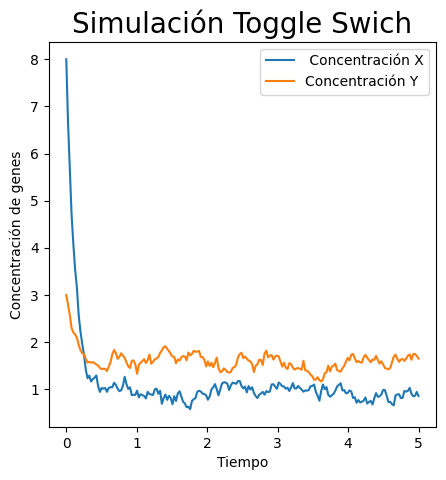

In [14]:
t_span = [0, 5]
times = np.linspace(t_span[0], t_span[1], 200)
plt.figure(figsize=(5,5))
plt.plot(times,np.array(varf)[0,0,0,:], label=" Concentración X")
plt.plot(times,np.array(varf)[0,0,1,:], label="Concentración Y")
plt.xlabel('Tiempo')
plt.ylabel('Concentración de genes')
plt.title('Simulación Toggle Swich', fontsize=20)
plt.legend()
plt.show()

## Coeficientes Varf

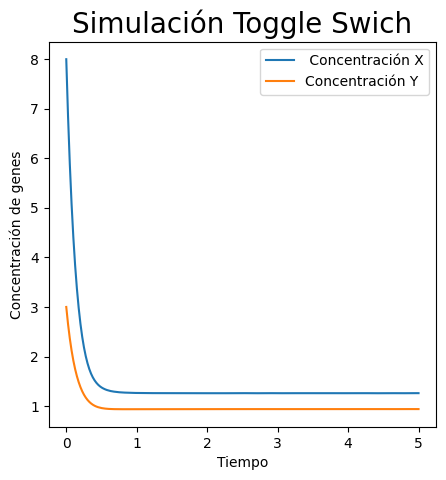

[ 5  2  6 10  7  7  4]


In [16]:
from scipy.integrate import solve_ivp

for i in range(0, 1):
    # constantes
    a1 = coefvarf[0,0]
    a2 = coefvarf[0,1]
    b1 = coefvarf[0,2]
    b2 = coefvarf[0,3]
    d1 = coefvarf[0,4]
    d2 = coefvarf[0,5]
    n = coefvarf[0,6]


    def f(t, y):

        # asignar a cada ODE a un elemento de vector
        X = y[0]
        Y = y[1]

        # definimos cada ODE
        dX_dt = a1/(1+Y**n)-d1*X+b1
        dY_dt = a2/(1+X**n)-d2*Y+b1

        return [dX_dt, dY_dt]

    # Declaramos el vector de tiempo
    t_span = [0, 5]
    times = np.linspace(t_span[0], t_span[1], 200)

    for i_ci in range(0, 1):
        # Definimos las condiciones iniciales
        y0 = (varf[0,0,0,0],varf[0,0,1,0])

        # Resolvemos
        # Modificar manualmente el intervalo de tiempo
        sol = solve_ivp(f, t_span, y0, t_eval=times)
        # sol=solve_ivp(f, t_span, y0) #Dejar que la librería elija el mejor intervalo
        tiempo = sol.t
        var1 = sol.y[0]
        var2 = sol.y[1]

        # Graficamos
        plt.figure(figsize=(5, 5))
        plt.plot(tiempo, var1, label=" Concentración X")
        plt.plot(tiempo, var2, label="Concentración Y")
        plt.xlabel('Tiempo')
        plt.ylabel('Concentración de genes')
        plt.title('Simulación Toggle Swich', fontsize=20)
        plt.legend()
        plt.show()
print(coefvarf[0,:])

## Datos Campvec

Text(0, 0.5, 'Concentración Y')

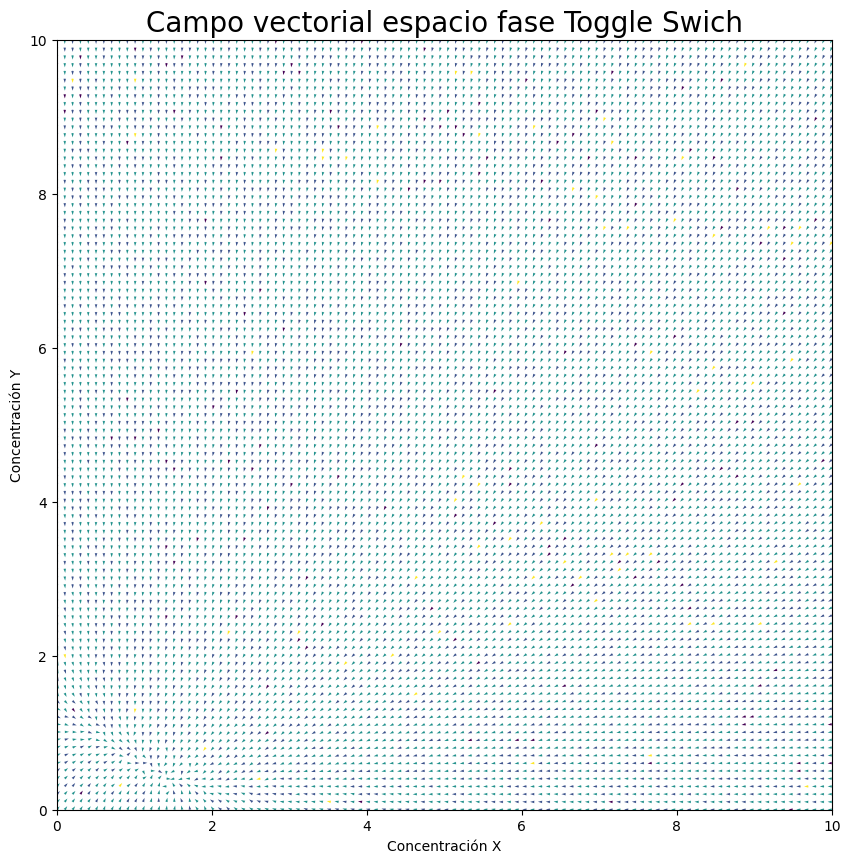

In [40]:
y1 = np.linspace(0, 10, 100)
y2 = np.linspace(0, 10, 100)
Y1, Y2 = np.meshgrid(y1, y2)
t1 = 0
u, v = np.zeros(Y1.shape), np.zeros(Y2.shape)
NI, NJ = Y1.shape        
u,v = np.array(campvec)[0,0,:,:], np.array(campvec)[0,1,:,:]
M = (np.hypot(u,v))
u /= M
v /= M

plt.figure(figsize=(10,10))
Q = plt.quiver(Y1, Y2, u, v, M, angles='xy')
plt.title('Campo vectorial espacio fase Toggle Swich', fontsize=20)
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.xlabel('Concentración X')
plt.ylabel('Concentración Y')

## Coeficientes Campvec

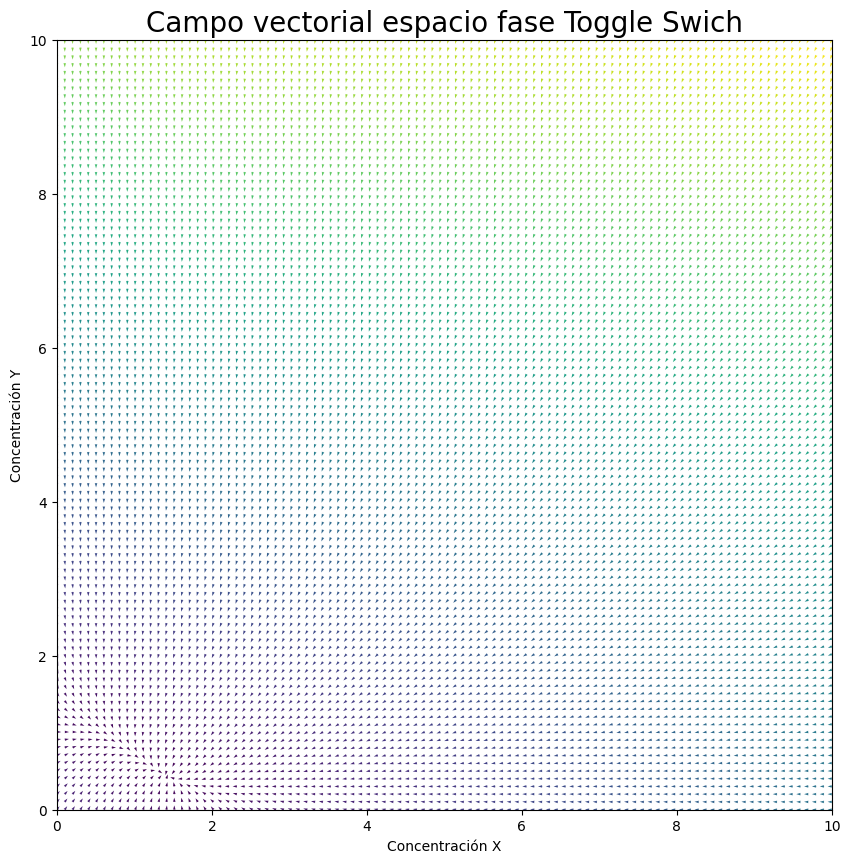

In [41]:
for i in range(0, 1):
    # constantes
    a1 = coefcampvec[0,0]
    a2 = coefcampvec[0,1]
    b1 = coefcampvec[0,2]
    b2 = coefcampvec[0,3]
    d1 = coefcampvec[0,4]
    d2 = coefcampvec[0,5]
    n = coefcampvec[0,6]

    def f(t, y):

        # asignar a cada ODE a un elemento de vector
        X = y[0]
        Y = y[1]

        # definimos cada ODE
        dX_dt = a1/(1+Y**n)-d1*X+b1
        dY_dt = a2/(1+X**n)-d2*Y+b1

        return [dX_dt, dY_dt]

    x_range_neg = 0
    x_range_pos = 10
    y_range_neg = 0
    y_range_pos = 10

    y1 = np.linspace(x_range_neg, x_range_pos, 100)
    y2 = np.linspace(y_range_neg, y_range_pos, 100)

    Y1, Y2 = np.meshgrid(y1, y2)
    
    t1 = 0

    u, v = np.zeros(Y1.shape), np.zeros(Y2.shape)

    NI, NJ = Y1.shape

    u1, v1 = f(t1, [Y1, Y2])
    u, v = f(t1, [Y1, Y2])
    M = (np.hypot(u, v))
    u /= M
    v /= M

    plt.figure(figsize=(10,10))
    Q = plt.quiver(Y1, Y2, u, v, M, angles='xy')
    plt.title('Campo vectorial espacio fase Toggle Swich', fontsize=20)
    plt.xlim([0, 10])
    plt.ylim([0, 10])
    plt.xlabel('Concentración X')
    plt.ylabel('Concentración Y')
